In [103]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import skimage.color

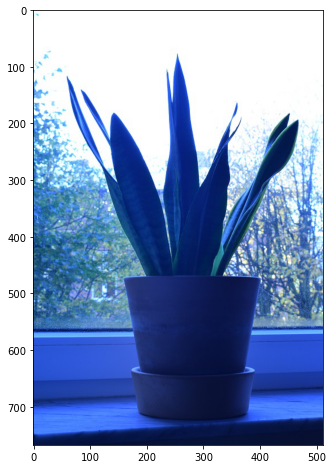

In [104]:
im = np.array(Image.open('t1.jpg'))

plt.figure(figsize=(8,8))
plt.imshow(im)

In [105]:
times = [1, 2]

names = [f't{t}'.replace('.', '_')+'.jpg' for t in times]
names



['t1.jpg', 't2.jpg']

In [106]:
images = [np.array(Image.open(fname)) for fname in names]

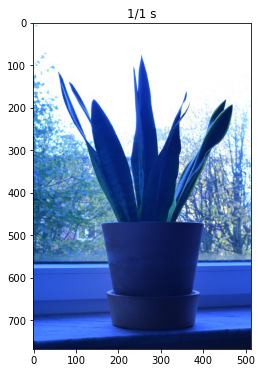

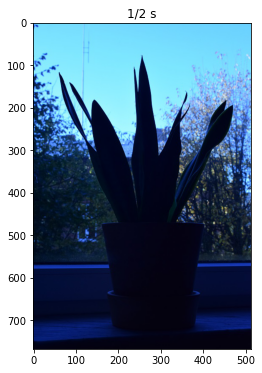

In [107]:
for i, im in enumerate(images):
  plt.figure(figsize=(6,6))
  plt.imshow(im)
  plt.title(f'1/{times[i]} s')

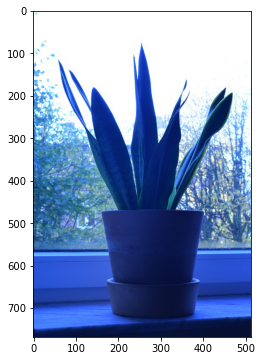

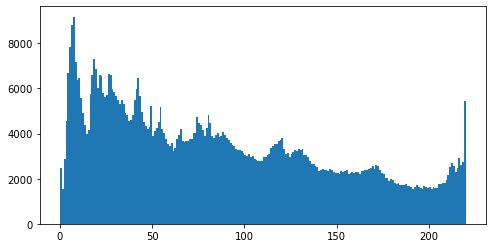

In [108]:
im = images[0]

plt.figure(figsize=(6,6))
plt.imshow(im)

plt.figure(figsize=(8,4))
hist = plt.hist(im.ravel(), 220, [0, 220])

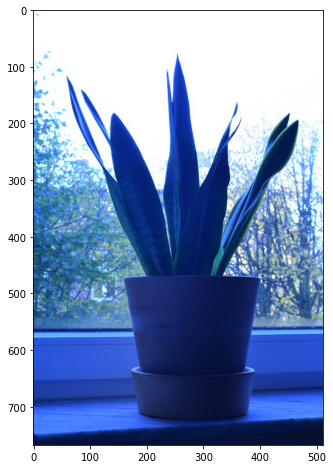

In [109]:
images_f32 = [im/255.0 for im in images]

plt.figure(figsize=(8,8))
plt.imshow(images_f32[0])

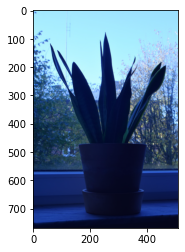

In [110]:
im_hdr = images_f32[0] + images_f32[-1]*times[-1]
im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.imshow(im_hdr)

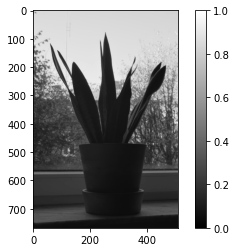

In [111]:
plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 1)

Text(0.5, 1.0, 'org')

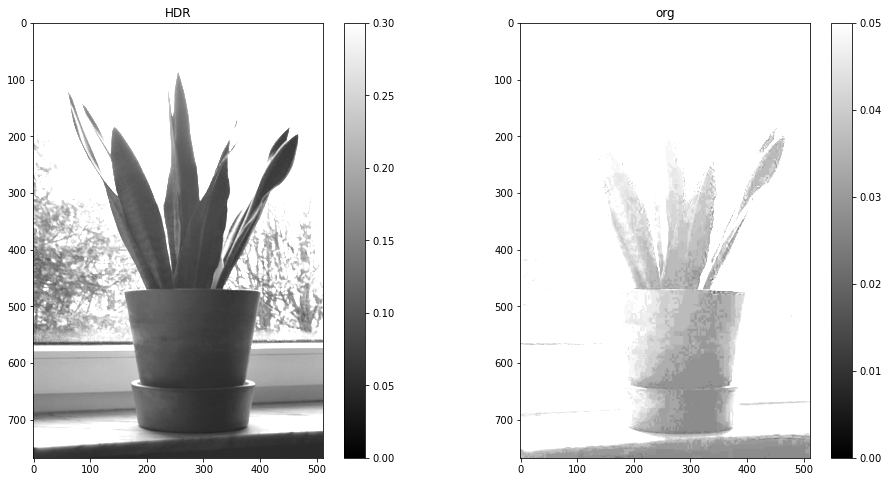

In [112]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 0.30)
plt.title('HDR')

plt.subplot(1,2,2)
plt.imshow(np.mean(images_f32[-1], axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 0.05)
plt.title('org')

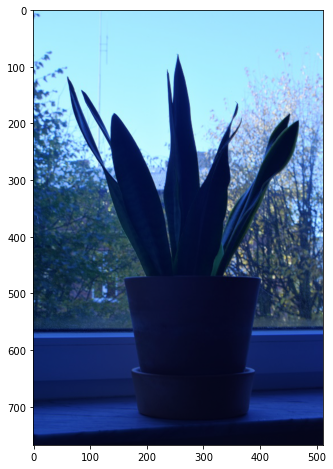

In [113]:
im_hdr = np.zeros(images_f32[0].shape, dtype=np.float32)

for i, im in enumerate(images_f32):
  im_hdr = im_hdr + im*times[i]

im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.figure(figsize=(8,8))
plt.imshow(im_hdr)

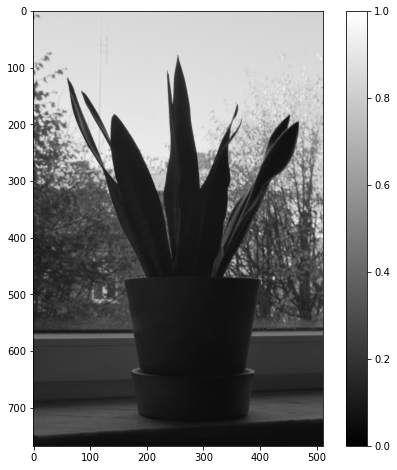

In [114]:
plt.figure(figsize=(8,8))

plt.imshow(np.mean(im_hdr, axis=2), cmap='gray')
plt.colorbar()
plt.clim(0, 1)

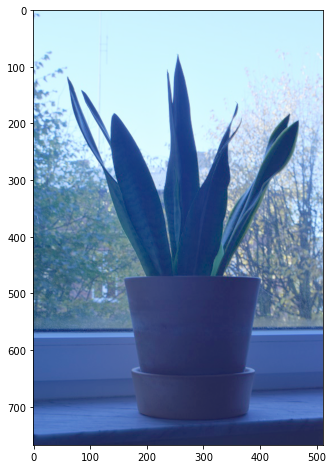

In [115]:
plt.figure(figsize=(8,8))
plt.imshow(im_hdr**0.5)

In [116]:
#Obraz HDR

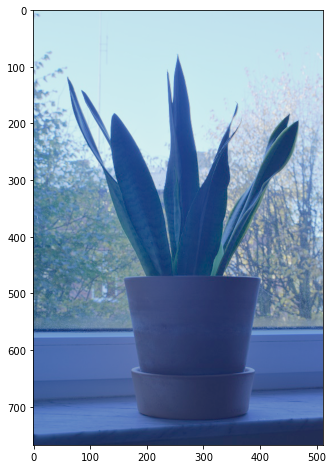

In [117]:
im_hdr = np.zeros(images_f32[0].shape, dtype=np.float32)
w_sum = np.zeros((images_f32[0].shape[0], images_f32[0].shape[1], 1))

for i, im in enumerate(images_f32):
  w = np.expand_dims(np.mean(im, axis=2), axis=2)
  im_hdr = im_hdr + im*w*times[i]
  w_sum = w_sum + w

im_hdr = im_hdr/w_sum

im_hdr = (im_hdr - np.min(im_hdr))/(np.max(im_hdr) - np.min(im_hdr))

plt.figure(figsize=(8,8))
plt.imshow(im_hdr**0.5)

In [118]:
#Zapisanie
im_white=im_hdr**0.5


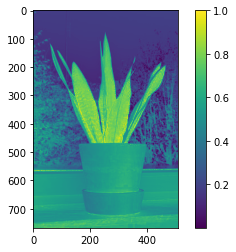

In [119]:
im1_hsv = skimage.color.rgb2hsv(im_white)

plt.imshow(im1_hsv[:,:,1])
plt.colorbar()

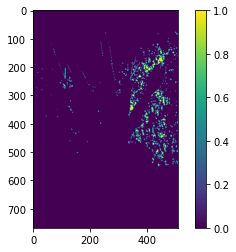

In [120]:
mask = im1_hsv[:,:,1] < 0.1
plt.imshow(mask)
plt.colorbar()

In [121]:

im_hsv = skimage.color.rgb2hsv(im_white)

im_hsv.shape

(768, 512, 3)

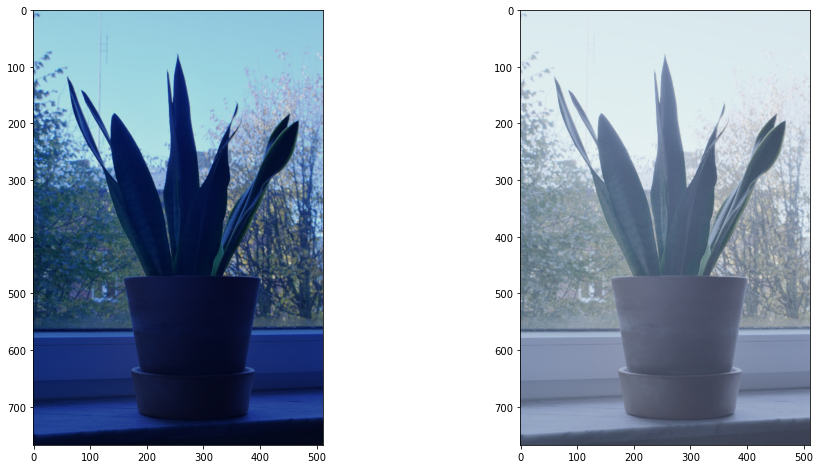

In [123]:
im_hsv2 = im_hsv.copy()
im_hsv2[:,:,1] = im_hsv2[:,:,1]*0.45

im2 = skimage.color.hsv2rgb(im_hsv2)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.imshow(im_hdr)

plt.subplot(1,2,2)
plt.imshow(im2)